## Observations and Insights

## Dependencies and starter code

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
merged_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Groups the dataframe by drug regimen
regimen_df = merged_df.groupby("Drug Regimen")
tumor_vol = regimen_df["Tumor Volume (mm3)"]

# Calculates each stat
count = tumor_vol.count()
mean = tumor_vol.mean()
median = tumor_vol.median()
variance = tumor_vol.var()
std_dev = tumor_vol.std()
sem = tumor_vol.sem()

# Creates a dataframe of all the statostics
tumor_size_df = pd.DataFrame({
    "Count" : count,
    "Mean" : mean,
    "Median" : median,
    "Variance" : variance,
    "Standard Deviation" : std_dev,
    "SEM" : sem
})

tumor_size_df.sort_values("Mean")

,Count,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,182,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

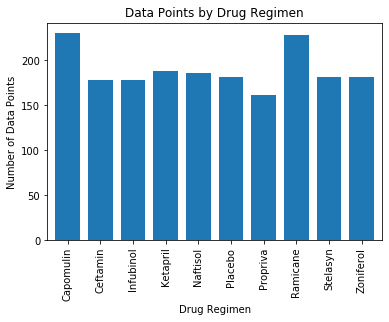

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
tumor_size_df["Count"].plot(kind = "bar", title = "Data Points by Drug Regimen", width = .75)
plt.ylabel("Number of Data Points")
plt.show()

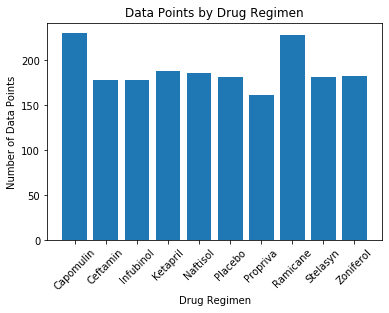

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(tumor_size_df))
plt.bar(x_axis, count)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, tumor_size_df.index.tolist(), rotation = 45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points by Drug Regimen")
plt.show()

## Pie plots

In [6]:
# Creates a dataframe to be used in the pie plots below
temp_df = merged_df.groupby('Sex')

count = temp_df["Mouse ID"].nunique()
sex_df = pd.DataFrame({"Count" : count})
sex_df.head()


,Count
Sex,
Female,124
Male,125


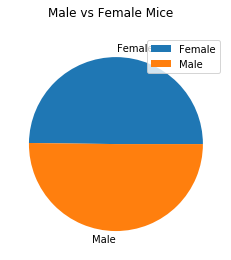

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df.plot(kind = "pie", subplots = True, title = "Male vs Female Mice")
plt.ylabel("")
plt.show()

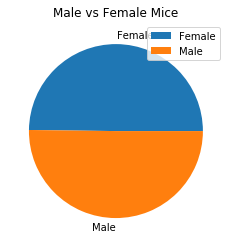

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_df.index.tolist()
count = sex_df["Count"]

plt.pie(count, labels=labels)
plt.title("Male vs Female Mice")
plt.legend()
plt.show()

## Quartiles, outliers and boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

# Creates a dataframe of only the final volumes of each mouse's tumor
final_vol_df = merged_df.groupby('Mouse ID')
final_vol_df = final_vol_df.tail(1)

# Creates a list of only the top 4 most promising regimens by smallest mean tumor volume
most_promising_df = tumor_size_df.sort_values("Mean").nsmallest(4, "Mean")
promising_regimens = most_promising_df.index.tolist()
promising_regimens

['Ramicane', 'Capomulin', 'Propriva', 'Ceftamin']

In [101]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Saves the top 4 regimens as separate dataframes
ramicane_df = final_vol_df[final_vol_df["Drug Regimen"] == "Ramicane"]
capomulin_df = final_vol_df[final_vol_df["Drug Regimen"] == "Capomulin"]
propriva_df = final_vol_df[final_vol_df["Drug Regimen"] == "Propriva"]
ceftamin_df = final_vol_df[final_vol_df["Drug Regimen"] == "Ceftamin"]

# Cycles through the list of dataframes and calulates IQR for each
df_list = [ramicane_df, capomulin_df, propriva_df, ceftamin_df]

for df in df_list:
    quartiles = df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = df[(df["Tumor Volume (mm3)"] < lower_bound) | (df["Tumor Volume (mm3)"] > upper_bound)].count()["Tumor Volume (mm3)"]

    print(f"There are {outliers} potential outliers for {df.iloc[0]['Drug Regimen']}")
    print(f"The upper bound is {round(upper_bound, 2)} and the lower bound is {round(lower_bound, 2)}")
    print("---------------------------------------------------------------")

There are 0 potential outliers for Ramicane
The upper bound is 54.31 and the lower bound is 17.91
---------------------------------------------------------------
There are 0 potential outliers for Capomulin
The upper bound is 51.83 and the lower bound is 20.7
---------------------------------------------------------------
There are 0 potential outliers for Propriva
The upper bound is 82.74 and the lower bound is 28.95
---------------------------------------------------------------
There are 0 potential outliers for Ceftamin
The upper bound is 87.67 and the lower bound is 25.36
---------------------------------------------------------------


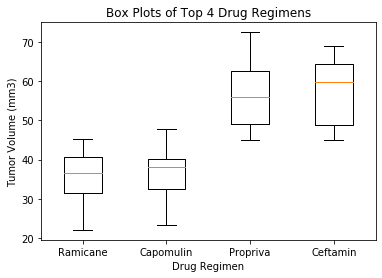

In [105]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axes = plt.subplots()
all_data = [ramicane_df["Tumor Volume (mm3)"], capomulin_df["Tumor Volume (mm3)"], propriva_df["Tumor Volume (mm3)"], ceftamin_df["Tumor Volume (mm3)"]]
bplot = axes.boxplot(all_data, vert = True)

plt.setp(axes, xticklabels = promising_regimens)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.title("Box Plots of Top 4 Drug Regimens")
plt.show()

## Line and scatter plots

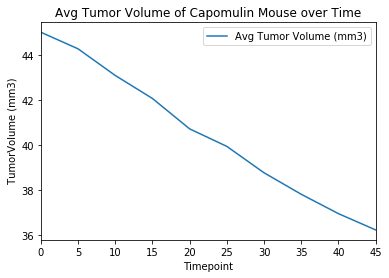

In [113]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
temp_capomulin_df = merged_df[merged_df["Drug Regimen"] == "Capomulin"]
grouped_df = temp_capomulin_df.groupby("Timepoint")

avg_vol = grouped_df["Tumor Volume (mm3)"].mean()
capomulin_vol_df = pd.DataFrame({"Avg Tumor Volume (mm3)": avg_vol})

capomulin_vol_df.plot(kind="line")
plt.title("Avg Tumor Volume of Capomulin Mouse over Time")
plt.ylabel(" TumorVolume (mm3)")
plt.show()

Text(0.5, 1.0, "Tumor Volume by Mouse's Weight")

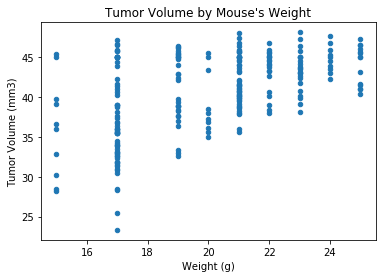

In [118]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
temp_capomulin_df.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)")
plt.title("Tumor Volume by Mouse's Weight")

Text(0, 0.5, 'Tumor Volume (mm3)')

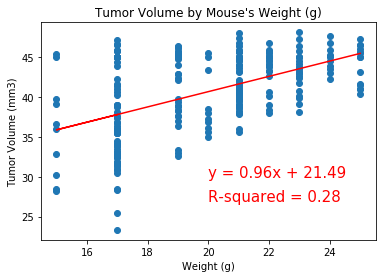

In [129]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_vals = temp_capomulin_df["Weight (g)"]
y_vals = temp_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_values = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_vals,y_vals)
plt.plot(x_vals,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.annotate(f"R-squared = {round(rvalue**2, 2)}",(20,27),fontsize=15,color="red")
plt.title("Tumor Volume by Mouse's Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")